Group/Independent Project 1: EDA with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [6]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_data = pd.read_csv('sample_submission.csv')

print(train_data.describe())




                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [7]:
print(test_data.describe())

                Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min 

In [8]:
print(sample_data.describe())

                Id      SalePrice
count  1459.000000    1459.000000
mean   2190.000000  179183.918243
std     421.321334   16518.303051
min    1461.000000  135751.318893
25%    1825.500000  168703.011202
50%    2190.000000  179208.665698
75%    2554.500000  186789.409363
max    2919.000000  281643.976117


In [13]:
print("Summary statistics for SalesPrice:")
print(train_data['SalePrice'].describe())

Summary statistics for SalesPrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


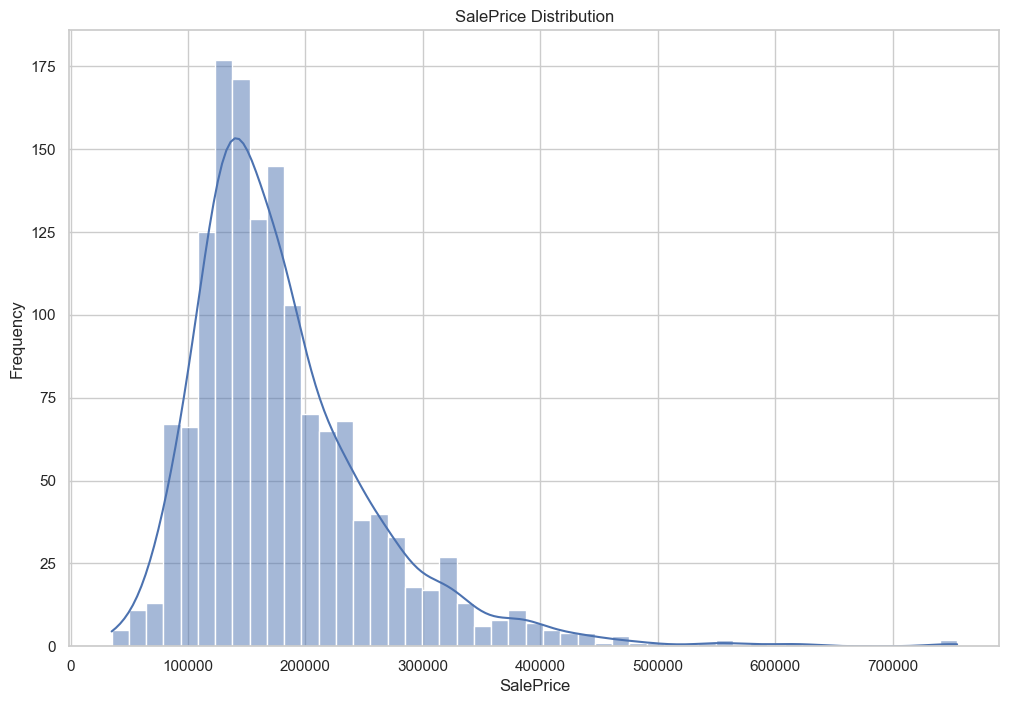

In [23]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data["SalePrice"], kde=True)
plt.title("SalePrice Distribution")
plt.ylabel('Frequency')
plt.xlabel('SalePrice')
plt.show()

Interpretation
Sales prices for the house is majorly skewed to the right indicating that majority of the houses were fairly priced(Affordable). It is also important to note that most houses were had a price range 150k to 180k

In [6]:

import pandas as pd
train_data = pd.read_csv('train.csv')

# Continue with analysis
print("Summary statistics for OverallCond:")
print(train_data["OverallCond"].describe())


Summary statistics for OverallCond:
count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64


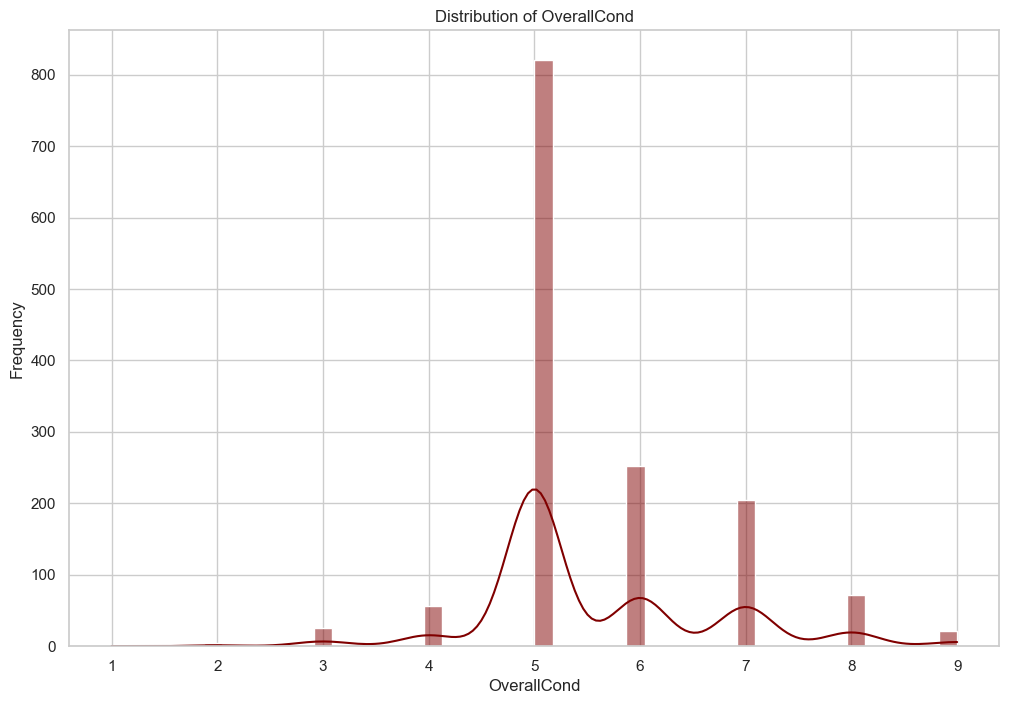

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(train_data['OverallCond'], kde=True, color='maroon')
plt.title('Distribution of OverallCond')
plt.xlabel('OverallCond')
plt.ylabel('Frequency')
plt.show()

TOTAL Rooms Above Grade

In [52]:
import pandas as pd
train_data = pd.read_csv('train.csv')

# Continue with analysis
print("Summary statistics for TotRmsAbvGrd:")
print(train_data["TotRmsAbvGrd"].describe())

Summary statistics for TotRmsAbvGrd:
count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


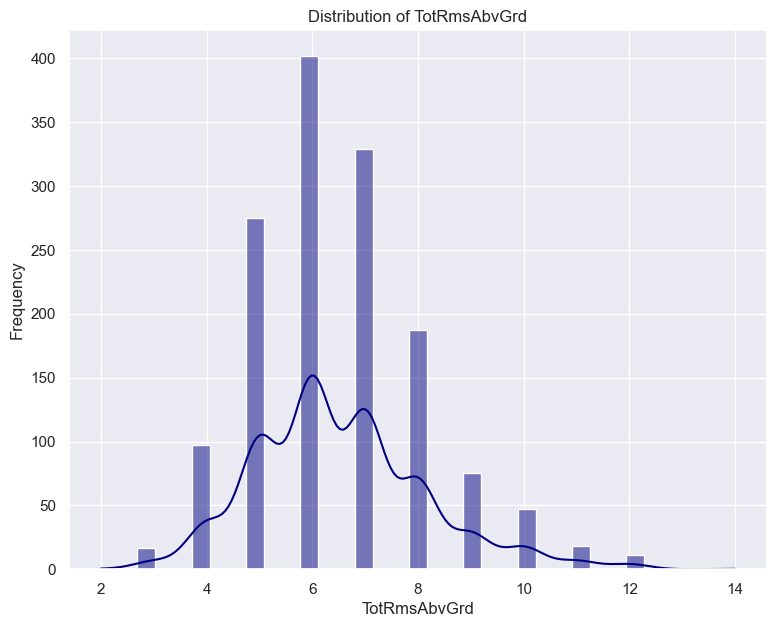

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="darkgrid")
plt.figure(figsize=(9, 7))
sns.histplot(train_data['TotRmsAbvGrd'], kde=True, color='navy')
plt.title('Distribution of TotRmsAbvGrd')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Frequency')

plt.show()

Total Rooms Distribution Interpretation 
The rooms were evenly distributed , with with 6 to 7 roomsbeing above grade


OVERALL CONDITION

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

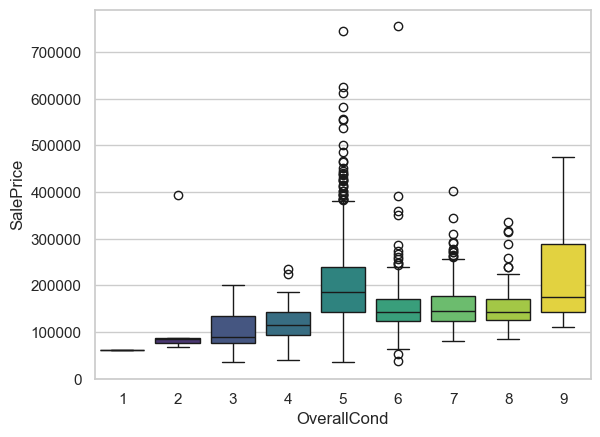

In [17]:
sns.boxplot(x='OverallCond', y='SalePrice', data=train_data, hue='OverallCond', palette='viridis', legend=False)


Above shows that majority of the houses with an overall condition of 5(average condition), had the highest sales price followed by those that were above average

EXPLORING CORRELATION

In [ ]:

numeric_columns = train_data.select_dtypes(include=['number']).columns
correlation_matrix = train_data[numeric_columns].corr()
correlation_saleprice = correlation_matrix['SalePrice']
top_positive_correlations = correlation_saleprice.sort_values(ascending=False).head(5)
top_negative_correlations = correlation_saleprice.sort_values().head(5)
print("\nTop positive correlations with SalePrice:")
print(top_positive_correlations)
print("\nTop negative correlations with SalePrice:")
print(top_negative_correlations)


In [11]:

# Select only numeric columns for correlation analysis
numeric_columns = train_data.select_dtypes(include=['number']).columns
correlation_matrix = train_data[numeric_columns].corr()

# Display top positive and negative correlations
correlation_saleprice = correlation_matrix['SalePrice']
top_positive_correlations = correlation_saleprice.sort_values(ascending=False).head(5)
top_negative_correlations = correlation_saleprice.sort_values().head(5)
print("\nTop positive correlations with SalePrice:")
print(top_positive_correlations)
print("\nTop negative correlations with SalePrice:")
print(top_negative_correlations)



Top positive correlations with SalePrice:
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

Top negative correlations with SalePrice:
KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
Name: SalePrice, dtype: float64


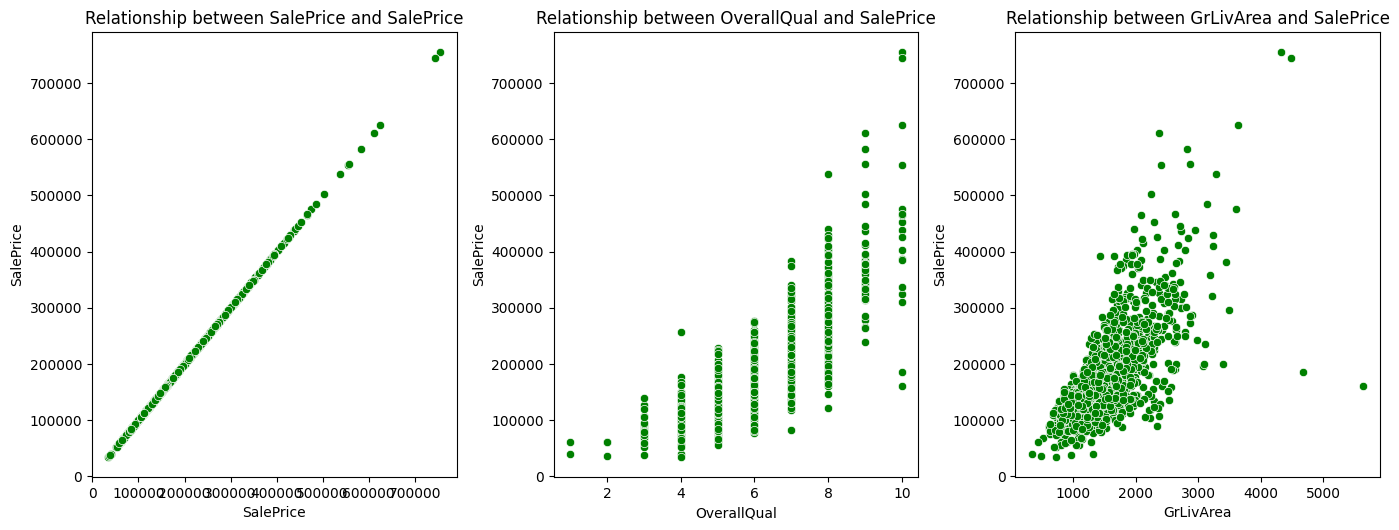

In [14]:

# Selecting only numeric columns for correlation analysis
numeric_columns = train_data.select_dtypes(include=['number']).columns
correlation_matrix = train_data[numeric_columns].corr()
correlation_saleprice = correlation_matrix['SalePrice'].sort_values(ascending=False)
# top features with the strongest positive correlations
strongest_positive_corr = correlation_saleprice.head(3)  
# Plotting strongest positive correlations
plt.figure(figsize=(14, 10))
for i, feature in enumerate(strongest_positive_corr.index):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='SalePrice', data=train_data, color='green')
    plt.title(f'Relationship between {feature} and SalePrice')

plt.tight_layout()
plt.show()


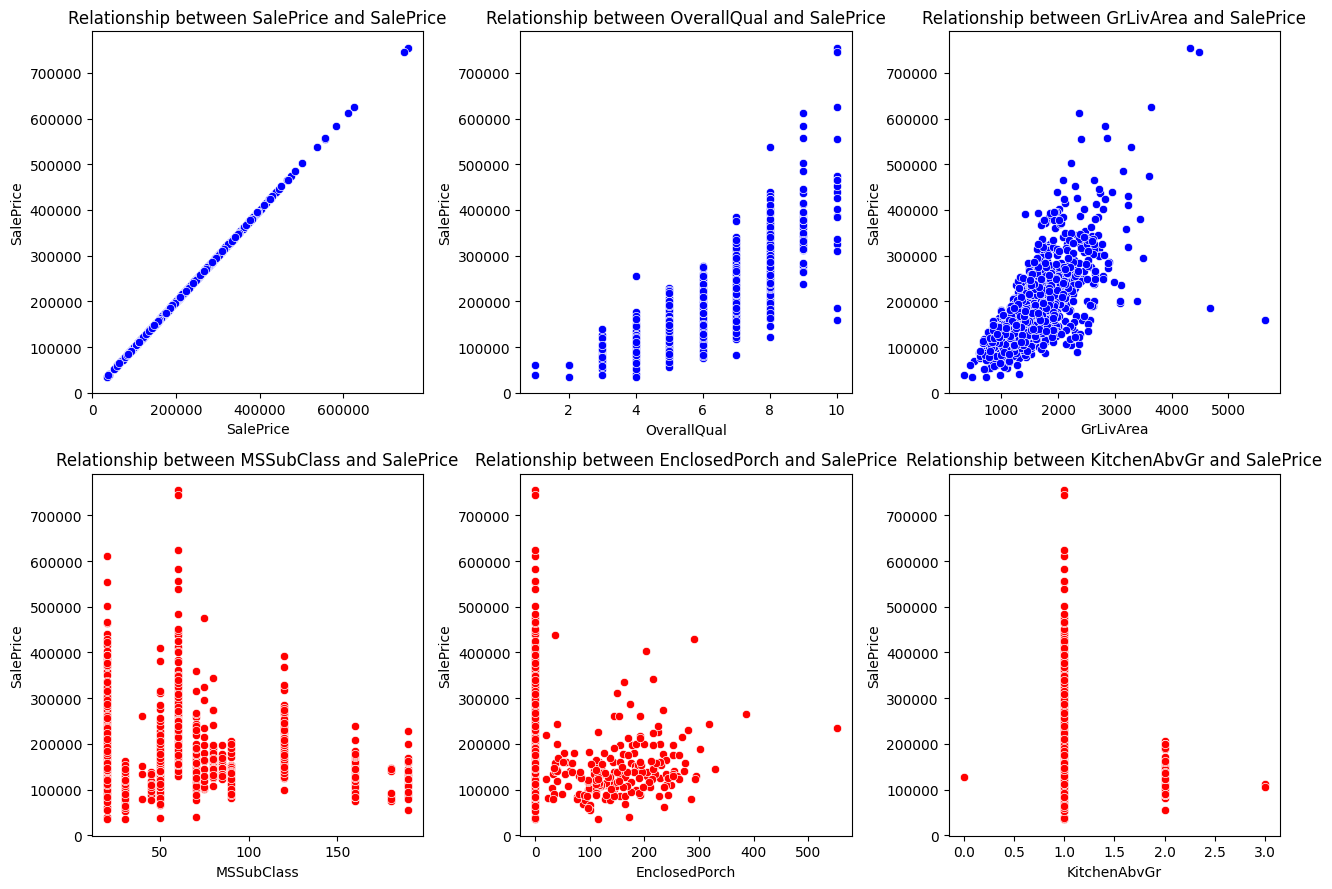

In [19]:


# Extract the top features with the strongest correlations
top_positive_corr = correlation_saleprice.head(3)
top_negative_corr = correlation_saleprice.tail(3)

# Concatenate the top positive and negative correlations
top_correlations = pd.concat([top_positive_corr, top_negative_corr])

# Plot strongest correlations
plt.figure(figsize=(13, 9))
for i, feature in enumerate(top_correlations.index):
    color = 'blue' if top_correlations[feature] > 0 else 'red'
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='SalePrice', data=train_data, color=color)
    plt.title(f'Relationship between {feature} and SalePrice')

plt.tight_layout()
plt.show()


CREATING A NEW FEATURE

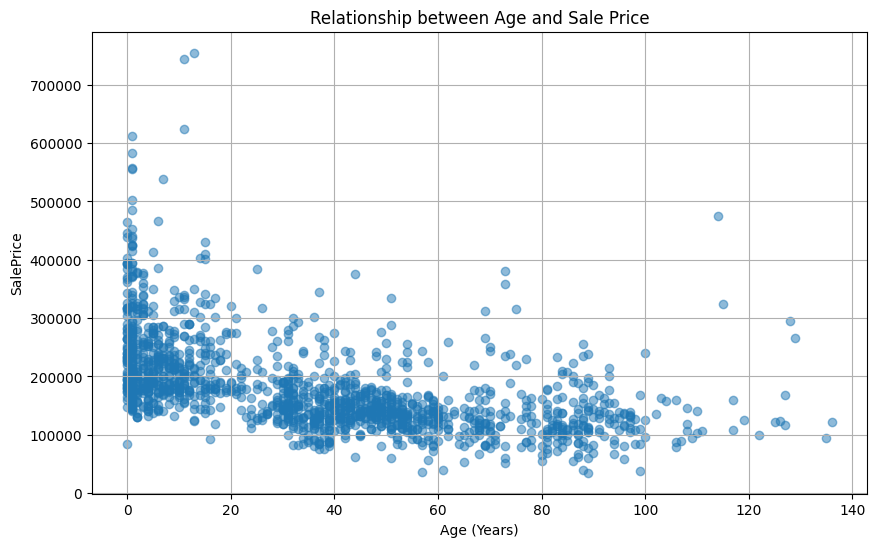

In [25]:


train_data['Age'] = train_data['YrSold'] - train_data['YearBuilt']
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Age'], train_data['SalePrice'], alpha=0.5)
plt.title('Relationship between Age and Sale Price')
plt.xlabel('Age (Years)')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()


POLISHED VISUALIZATION

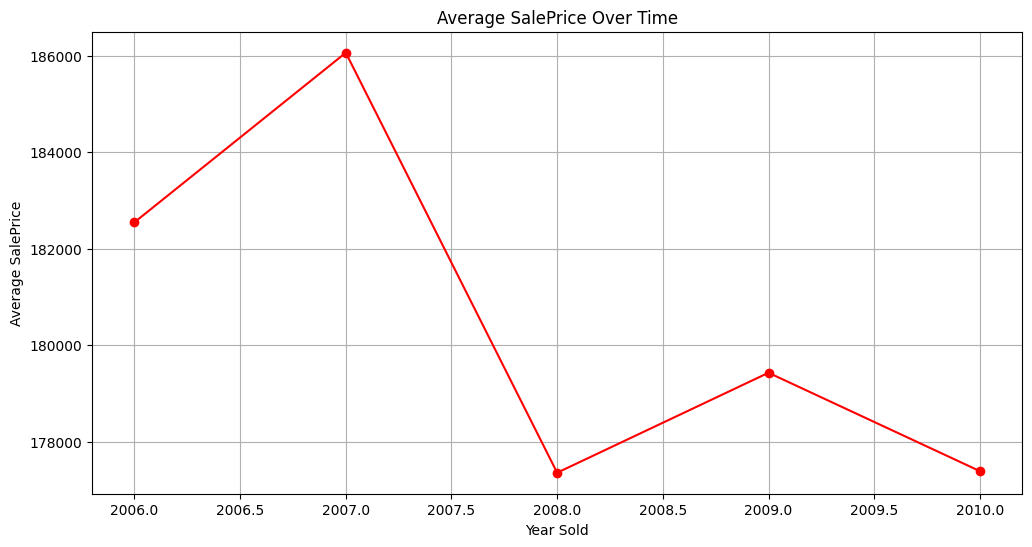

In [41]:
# Visualization 1: Line Plot showing Average Sale Price Over Time
plt.figure(figsize=(12, 6))
avg_price_by_year = train_data.groupby('YrSold')['SalePrice'].mean()
avg_price_by_year.plot(marker='o', color='r')
plt.title('Average SalePrice Over Time')
plt.xlabel('Year Sold')
plt.ylabel('Average SalePrice')
plt.grid(True)

Interpretation
There has been a fluctuating trend in the overage sales price over the years.
In 2007, and this could be attributed to increased demand in the real estate market 

